In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import random

In [256]:
Movies = pd.read_csv('Wins.txt')
# glimspe at the first 5 rows 
Movies.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008


In [257]:
print(Movies.shape) # Its has 77 rows and 8 columns 
print(Movies.isna().sum()) # None exist 
print(Movies.isnull().sum()) # None exist 
print(Movies.duplicated().sum()) # There appear to be 2 rows that hold duplicated varaibles 


(77, 8)
Film                 0
Genre                0
Lead Studio          0
Audience score %     0
Profitability        0
Rotten Tomatoes %    0
Worldwide Gross      0
Year                 0
dtype: int64
Film                 0
Genre                0
Lead Studio          0
Audience score %     0
Profitability        0
Rotten Tomatoes %    0
Worldwide Gross      0
Year                 0
dtype: int64
2


In [258]:
# Changing Name  
Movies.rename({'Audience score %' : 'Likes'}, axis = 1, inplace = True)
Movies.rename({'Rotten Tomatoes %' :  'Dislikes'}, axis = 1, inplace = True)
Movies.rename({'Worldwide Gross' :  'Global_Gains'}, axis = 1, inplace = True)
Movies.rename({'Lead Studio' : 'Brand'}, axis = 1, inplace = True)
Movies.rename({'Profitability' : 'Profit'}, axis = 1, inplace = True)

In [259]:
# Verify the dataframe's columns original names were rename
print(Movies.columns)
# Evaluating each variabe and determining if it's current form is suitable for an effective data analysis 
print(Movies.dtypes)
# Some varables such as Global Gains illustrate as numeric  with an object and string type of classification

Index(['Film', 'Genre', 'Brand', 'Likes', 'Profit', 'Dislikes', 'Global_Gains',
       'Year'],
      dtype='object')
Film             object
Genre            object
Brand            object
Likes             int64
Profit          float64
Dislikes          int64
Global_Gains     object
Year              int64
dtype: object


In [260]:
# Global_Gains variable has must be coverted into an integer or a float due to it being quantitative at face value 
# It will be a huge influencial factor along with profit in determining which brand and genre sells and earns the most 
Matcher = lambda x : x.replace('$', '') # Strip the $ sign 
print(Movies.Global_Gains.dtypes) # It remain an object 
Movies['Global_Gains'] = Movies['Global_Gains'].astype('str') # ensure it is a string
Movies['Global_Gains'] = Movies['Global_Gains'].apply(Matcher) # apply the matcher lamba function 
print(Movies.Global_Gains.head()) # first five rows


object
0     41.94 
1     19.62 
2     26.66 
3     43.04 
4    219.37 
Name: Global_Gains, dtype: object


In [261]:
# convert the column into a float due to it's decimal . placed in the middle and for the purpose of calculating it 
Movies['Global_Gains'] = Movies['Global_Gains'].astype(float)  
 # ensure the previous astype conversion was sucessful
print(Movies.Global_Gains.dtype) 

float64


list of columns with a total of  8  unique 

Index(['Film', 'Genre', 'Brand', 'Likes', 'Profit', 'Dislikes', 'Global_Gains',
       'Year'],
      dtype='object') 

total films for each genre that contain more than one film 

Comedy : 41
Drama : 13
Romance : 13
Animation : 4


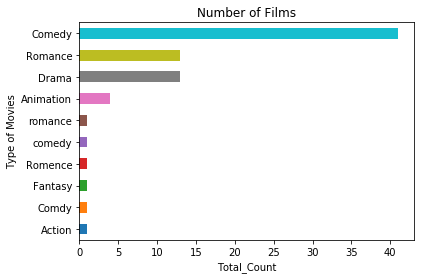

In [262]:
print("list of columns with a total of " , Movies.columns.nunique() ," unique \n")
print(Movies.columns, "\n")

Total = Movies.Genre.value_counts().sort_values(ascending = False)
print("total films for each genre that contain more than one film \n")
for i, g in Total.iteritems():
    if g == 1: # skip all values that only contain one film
        continue
    else:
        print(i,":",g)
Ghost = Movies.groupby(['Genre'])['Film'].count().sort_values(ascending = True)
fig, ax = plt.subplots() 
Ghost.plot(kind = 'barh')
ax.set(ylabel = 'Type of Movies', xlabel = 'Total_Count', title = 'Number of Films')

plt.show()
# genres ( Comdedy, Drama , Romanc and Animation ) each holds atleast more than one film 
# other genres of that only contain one film may not provide an accurate inight due to it's aggerate values being all of same 
# films such as (Action and Fatasy can be incoporate within a ( Studio Brand's ) overall agg)

In [263]:
# dimensions provides the scope that will used to evaluate on which cleaning methods will be used 
print(" The dimensions of the movies dataframe : ", Movies.shape) 
print(" It contains " , Movies.index.nunique(), " rows  and ", Movies.columns.nunique(), "columns")
Categorical = Movies[['Film', 'Genre' ,'Brand', 'Year']]
# the amount of unique films is not equal to dimesions of the dataframe 
# therefore there mite be some duplicates and I must take the proper steps of droping them prior to preceding 
print(Categorical.nunique())
# confirm the  dimesions
print(Categorical.count())

 The dimensions of the movies dataframe :  (77, 8)
 It contains  77  rows  and  8 columns
Film     75
Genre    10
Brand    13
Year      5
dtype: int64
Film     77
Genre    77
Brand    77
Year     77
dtype: int64


In [264]:
# sum of 2 rows that are defined as duplicates 
print(Movies.duplicated().sum() , " rows are duplicates within this data frame \n")
# due to the fact that all Film names aren't unique  I must find which rows holds duplicate valuds 
# Using a for loop to iterrate through the Series columns to rapidly find those duplicate variables
for Zips, Rips in Movies.loc[(Movies['Film'].duplicated())].iterrows():
    print(Zips, Rips, "\n")
# two films appear  after the interation with a designated name of the film and index number 

2  rows are duplicates within this data frame 

46 Film            Mamma Mia!
Genre               Comedy
Brand            Universal
Likes                   76
Profit             9.23445
Dislikes                53
Global_Gains        609.47
Year                  2008
Name: 46, dtype: object 

65 Film            Gnomeo and Juliet
Genre                   Animation
Brand                      Disney
Likes                          52
Profit                    5.38797
Dislikes                       56
Global_Gains               193.97
Year                         2011
Name: 65, dtype: object 



In [265]:
specific_rows = [] # empty list of the duplicated rows 
for ice, cream in Movies.loc[(Movies['Film'].duplicated())].iterrows(): # using key and value pairs with emphasis on targeting the keys
    print('rows ', ice,' need removed')
    specific_rows.append(ice) # appending duplicated rows numbers to the empty list 
print('initial shape :', Movies.shape) # shape prior to modification
Movies.drop(specific_rows, axis = 0, inplace = True) # formula to drop those duplicate rows : using inplace to ensure a permenant change
print('shape after modfication', Movies.shape) # the shape is modified inot 75 rows and 8 columns 
print(" after modification that dataset contains " , Movies.index.nunique(), " rows  and ", Movies.columns.nunique(), "columns")

rows  46  need removed
rows  65  need removed
initial shape : (77, 8)
shape after modfication (75, 8)
 after modification that dataset contains  75  rows  and  8 columns


In [266]:
# which brands are genrating the most globally 
print(Movies.groupby(['Brand']).Global_Gains.sum())
# there are five brands out of the 13 that hold global sums past the 4 figure mark 


Brand
20th Century Fox          156.75
CBS                        77.09
Disney                   2020.53
Fox                       722.57
Independent              1546.94
Lionsgate                 152.59
New Line                   20.71
Paramount                 321.22
Sony                      403.12
Summit                   1242.26
The Weinstein Company      69.82
Universal                1182.57
Warner Bros.             2462.14
Name: Global_Gains, dtype: float64


In [267]:
brand = []
sums = []
losers = []
for summer, time in Movies.groupby(['Brand']).Global_Gains.sum().iteritems():
    if time < 1000.0:
        losers.append(summer)
        continue 
    else:
        brand.append(summer)
        sums.append(time)
print('                                top five brands to watch in the movie industry\n')
News = dict(zip(brand, sums))
print(News)

                                top five brands to watch in the movie industry

{'Disney': 2020.53, 'Independent': 1546.9399999999998, 'Summit': 1242.26, 'Universal': 1182.5700000000002, 'Warner Bros.': 2462.14}


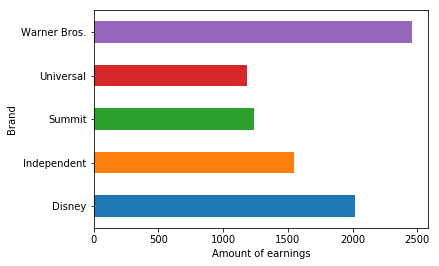

In [268]:
# displayt of my findings 
Champs = Movies.groupby(['Brand'])['Global_Gains'].sum()
Winners = Champs.drop(['20th Century Fox', 'CBS', 'Fox', 'Lionsgate', 'New Line', 'Paramount', 'Sony', 'The Weinstein Company'])
fig, ax = plt.subplots()
ax.set(xlabel = 'Amount of earnings', ylabel = 'High rising brands')
Winners.plot(kind = 'barh')

In [269]:
Nist = Movies.loc[(Movies['Global_Gains'] < 100)]
print('Average amount of dislikes for low gainers : ', Nist.Profit.mean())
print('low gainers summary :  \n', Nist.mean())
Mist =  Movies.loc[(Movies['Global_Gains'] > 200)]
print(' Average amount of profits for high gainers :', Mist.Profit.mean())
print('high gainers summary : ', Mist.mean())

Average amount of dislikes for low gainers :  3.8048036508571434
low gainers summary :  
 Likes             60.000000
Profit             3.804804
Dislikes          47.119048
Global_Gains      39.842857
Year            2009.261905
dtype: float64
 Average amount of profits for high gainers : 6.457627508684212
high gainers summary :  Likes             73.052632
Profit             6.457628
Dislikes          50.631579
Global_Gains     355.312105
Year            2008.684211
dtype: float64


In [270]:
Grabs = Movies.groupby(['Brand', 'Genre'])['Film'].count()
Plans = Grabs.drop(['20th Century Fox', 'CBS', 'Fox', 'Lionsgate', 'New Line', 'Paramount', 'Sony', 'The Weinstein Company'])
Plans
# Comedy 28 Animation 3 Drama 8 Romance 10 Fantasy 1 
# Genres such as Comedy Drama and Romance films tend to be a clear favorite and display a large enough quantity 

Brand         Genre    
Disney        Animation     3
              Comedy        4
Independent   Comedy        7
              Drama         4
              Romance       7
              romance       1
Summit        Comedy        2
              Drama         2
              Romance       1
Universal     Comedy        4
              Drama         2
              Romance       1
Warner Bros.  Comedy       11
              Fantasy       1
              Romance       2
Name: Film, dtype: int64

In [271]:
# gathering information on all brands to determine which ones are profiting more than the others
# this information will be used as underlying evidence to determine which genres are most popular with the audiences and profitable 
Brand_Choosing = Movies.groupby(['Brand'])['Profit'].sum() # what each brand made from 2007 to 2011
Profit_Ratings = Brand_Choosing.sort_values(ascending = False) # order from highest amoun of profit to least
print('Total Amount of Profits by Brand \n')
print(Profit_Ratings)
Drop_Bag = [] # for the least earning brands 
Ballers = []
for apps, laps in Profit_Ratings.iteritems():
    if laps < 18:
        Drop_Bag.append(apps) # for use of dropping those brand's that don't fit the logical requirements 
        continue
    else:
        Ballers.append(apps) #for the pies index labels
print(Ballers)
Deals = Profit_Ratings.drop(['Paramount', '20th Century Fox', 'The Weinstein Company', 'Lionsgate', 'CBS', 'New Line'])
# as we can see that the brand Indepedent holds almost half the share 
# it will be more easier to find out which geres of movies are the most popular
# also we must watch out for hidden values such as outliers as one film could be responsible for a large portion of that brands profit 
# Warner Bros. and Disney are choices to strike a comparative analysis from within the groupings in regards to the statement mentions previous 

Total Amount of Profits by Brand 

Brand
Independent              118.476823
Warner Bros.              44.714343
Disney                    44.436057
Summit                    31.889810
Fox                       27.069134
Universal                 26.615773
Sony                      19.345304
Paramount                 10.376000
20th Century Fox           5.064621
The Weinstein Company      3.663342
Lionsgate                  3.613018
CBS                        2.202571
New Line                   2.071000
Name: Profit, dtype: float64
['Independent', 'Warner Bros.', 'Disney', 'Summit', 'Fox', 'Universal', 'Sony']


                       List of the most profitable movies
['Independent', 'Warner Bros.', 'Disney', 'Summit', 'Fox', 'Universal', 'Sony']


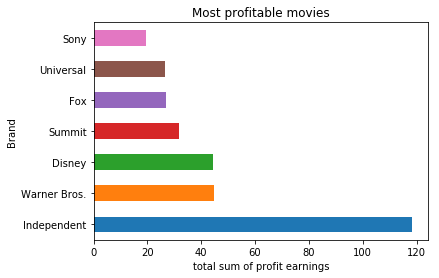

In [272]:
print('                       List of the most profitable movies')
print(Ballers)
fig , ax = plt.subplots()
ax.set(title  = 'Most profitable movies', xlabel = 'total sum of profit earnings', ylabel = 'profitable brands')
Deals.plot(kind = 'barh')
# Indenpent Movies have earned more than twice the amount in profits as the other brands 

In [273]:
# The amount of differebt genres films that a brand has 
Brad = Movies.groupby(['Brand', 'Genre'])['Film'].count()
Pitt = Brad.drop(['Paramount', '20th Century Fox', 'The Weinstein Company', 'Lionsgate', 'CBS', 'New Line'])
print('Sum of movies per genre of each of the leading brands ')
print(Pitt)
# Comedy 35   Animation 3 Romance 13 Fantasy 1 Drama 9 
# once again most of the highly profitable movies are Comedy Romance and Drama Films 

Sum of movies per genre of each of the leading brands 
Brand         Genre    
Disney        Animation     3
              Comedy        4
Fox           Comedy        5
              comedy        1
Independent   Comedy        7
              Drama         4
              Romance       7
              romance       1
Sony          Comdy         1
              Comedy        1
              Drama         1
              Romence       1
Summit        Comedy        2
              Drama         2
              Romance       1
Universal     Comedy        4
              Drama         2
              Romance       1
Warner Bros.  Comedy       11
              Fantasy       1
              Romance       2
Name: Film, dtype: int64


In [274]:
# prepare for line graphs
Loves = Movies.query('Genre == "Romance"')
Lovers = Loves.groupby(['Year'])['Profit'].sum()
Disk = Movies.query('Genre == "Drama"')
Ships = Disk.groupby(['Year'])['Profit'].sum()
Laughs = Movies.query('Genre == "Comedy"')
Apps = Laughs.groupby('Year')['Profit'].sum()
Toons = Movies.query('Genre == "Animation"')
Cars = Toons.groupby(['Year'])['Profit'].sum()

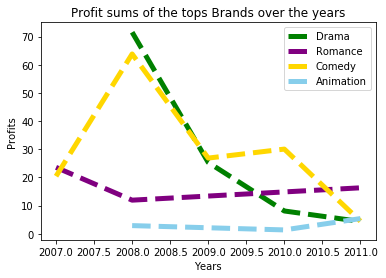

In [275]:
# line plot illustrate a trajectory of the total sum of profits for each year of the listed types of movies
# for the purposes of finding what year each type rised, peaked and began to decline 
fig , ax = plt.subplots()
Ships.plot(kind = 'line', linewidth = 5, linestyle = 'dashed', color = 'green', label = 'Drama')
Lovers.plot(kind = 'line', linewidth = 5, linestyle = 'dashed', color = 'purple', label = 'Romance')
Apps.plot(kind = 'line', linestyle = 'dashed', linewidth = 5, color = 'gold', label = 'Comedy')
Cars.plot(kind = 'line', linestyle = 'dashed', linewidth = 5, color = 'skyblue', label = 'Animation')
ax.set(title = 'Profit sums of the tops Brands over the years', xlabel = 'Years', ylabel = 'Profits')
ax.legend()
plt.show()

In [276]:
Flight = Movies.query('Genre == "Romance"')
Osaka = Flight.groupby(['Year'])['Global_Gains'].sum()
Risk= Movies.query('Genre == "Drama"')
Invest = Risk.groupby(['Year'])['Global_Gains'].sum()
Funnies = Movies.query('Genre == "Comedy"')
Bunnies = Funnies.groupby('Year')['Global_Gains'].sum()
Kyoto = Movies.query('Genre == "Animation"')
Kansai = Kyoto.groupby(['Year'])['Global_Gains'].sum()

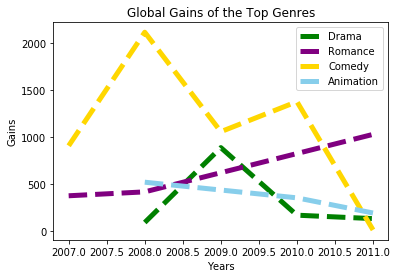

In [277]:
# romance films take a surge in gains after the 2008 hodling over 4 straight years in gains 
# comedy movies are now known to always be reliant and bounce back after a sluggish year 
fig , ax = plt.subplots()
Invest.plot(kind = 'line', linewidth = 5, linestyle = 'dashed', color = 'green', label = 'Drama')
Osaka.plot(kind = 'line', linewidth = 5, linestyle = 'dashed', color = 'purple', label = 'Romance')
Bunnies.plot(kind = 'line', linestyle = 'dashed', linewidth = 5, color = 'gold', label = 'Comedy')
Kansai.plot(kind = 'line', linestyle = 'dashed', linewidth = 5, color = 'skyblue', label = 'Animation')
ax.set(title = 'Global Gains of the Top Genres', xlabel = 'Years', ylabel = 'Gains')
ax.legend()
plt.show()

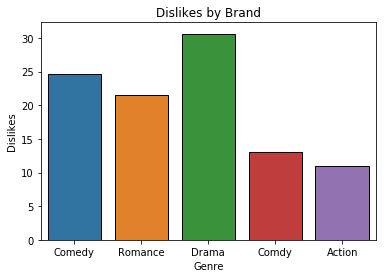

In [278]:
Cooling = sns.barplot(x = 'Genre', y = 'Dislikes', data = Movies.loc[(Movies['Dislikes'] < 45)],
            estimator = np.mean, ci = False, edgecolor = 'black')
Cooling.set(title = 'Dislikes by Brand')
plt.show()
# Use loc to make a more clear and concise illustration
# goal is to find out which more overall had the least amount of dislikes
# tt turns out to be drama had more criticisms but it definately does not effect it's standings in the number 1 or 2 spot 
# with this information I want to find out if a low dislike rating results in higher returns on profits 
# or perhaps more criticims lead to higher profits 

Total movies that profited above the  75% percentile :  19
Average Dislikes for them :  49.578947368421055
Average Likes for them :  72.21052631578948
Amount of other films :  56
Average Rate of Dislikes for the others :  45.44642857142857
The differences in average dislikes of the highest profiting movies and other :  4.1325187969924855


[Text(0, 0.5, 'Rate of Dislikes'),
 Text(0.5, 0, 'Groups'),
 Text(0.5, 1.0, 'Average Dislikes for the top 20 % movies compared to others')]

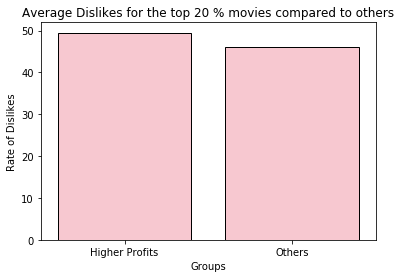

In [279]:
Orbit = Movies.Profit.describe()
Worth_While = Movies.loc[(Movies['Profit'] > 4.5)]
# There are 19 movies that generated profits higher than 4,5
print('Total movies that profited above the  75% percentile : ', Worth_While['Film'].count())
print('Average Dislikes for them : ', Worth_While.Dislikes.mean()) 
print('Average Likes for them : ', Worth_While.Likes.mean())
# For those that Profited in the 3rd Quantile had an average Dislikes of 49.57 
Others = Movies.loc[(Movies['Profit'] < 4.5)]
print('Amount of other films : ', Others['Film'].count())
Other_Dislikes = Others.Dislikes.mean()
print('Average Rate of Dislikes for the others : ', Other_Dislikes)
Crit_Diff = Worth_While.Dislikes.mean() -  Others.Dislikes.mean() 
print('The differences in average dislikes of the highest profiting movies and other : ', Crit_Diff)
# These movies actually recieved more criticism than others that didn't 
# Thus higher profits don't come at the nessecity of obtaining lower dislikes
Worth_Likes = Worth_While.Likes.mean()
labels = ['Higher Profits', 'Others']
Averages = [49.5, 46]
Plate = sns.barplot(labels , Averages, color = 'pink', edgecolor = 'black')
Plate.set(title = 'Average Dislikes for the top 20 % movies compared to others', 
          ylabel = 'Rate of Dislikes', xlabel = 'Groups')


In [280]:
# There is only a 100 million dollar difference among the mean and movies that exceed teh 75% percentile 
Movies.Global_Gains.describe()
Fast = Movies.loc[(Movies['Global_Gains'] > 199)]
print('Number of movies that made 200 million or more globally : ', Fast['Film'].count())
print('Average rate of dislikes for high gainers : ', Fast.Dislikes.mean())
print('Average rate of likes for high gainers : ', Fast.Likes.mean())
# the difference is just above one 
Profit_Gross_Dislikes = Fast.Dislikes.mean() - Worth_While.Dislikes.mean()
print(Profit_Gross_Dislikes)
Profit_Gross_Likes = Fast.Likes.mean() - Worth_While.Likes.mean()
# the difference is among one
print('Difference of average means among high gross and profiters : ', Profit_Gross_Likes)
# It is astounding the there are 19 films in the query for movies with a profit and global_gains above the 75$% percentile 
# both profit and global gross are done seperately 

Number of movies that made 200 million or more globally :  19
Average rate of dislikes for high gainers :  50.63157894736842
Average rate of likes for high gainers :  73.05263157894737
1.0526315789473628
Difference of average means among high gross and profiters :  0.8421052631578902


In [281]:
# Average likes and dislikes overall
print("Average Likes Overall : ", Movies.Likes.mean())
print("Average Dislikes Overall : ", Movies.Dislikes.mean())
# Average likes and dislikes of the top five brands 
print('Average amount of dislikes and likes per brand \n')
Brand_Popularity = Movies.groupby(['Brand'])['Dislikes', 'Likes'].agg(['mean'])
Brand_Popularity.drop(['20th Century Fox', 'CBS', 'Fox', 'Lionsgate', 'New Line', 'Paramount', 'Sony', 'The Weinstein Company'])

Average Likes Overall :  63.72
Average Dislikes Overall :  46.49333333333333
Average amount of dislikes and likes per brand 



,Dislikes,Likes
,mean,mean
Brand,,
Disney,65.285714,71.857143
Independent,45.473684,62.684211
Summit,39.200000,73.200000
Universal,59.000000,64.571429
Warner Bros.,35.071429,58.071429


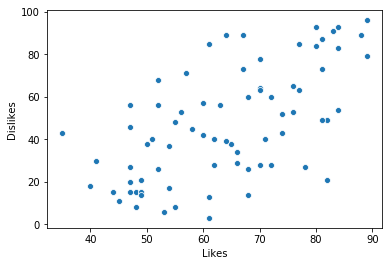

In [282]:
sns.scatterplot(x = 'Likes', y = 'Dislikes', data = Movies)
# it illustrates that the more likes you holds come at the cost of a higher rate of criticism
# I must understand that some of the most popular movies encounter the most criticims due to the higher amount of people to judge it 
# a larger audience means more ticket salses as most critics would have to pay to see th film
# does criticims and higher return on global gains hold some relation? 

In [283]:
Dislikes_Sings = Movies.describe().loc['25%', 'Dislikes'] # score under the first quartile
print(Dislikes_Sings)
Dis_Songs = Movies.loc[(Movies['Dislikes'] < 26.0) & (Movies['Profit'] > 5.1)] # Dislikes under Q1 and Profits over Q3
print(Dis_Songs.Profit.mean()) # Just above the score 
print(Dis_Songs[['Brand', 'Genre', 'Profit', 'Dislikes', 'Global_Gains']]) # only two films 
# critisims has no large influence on the amount of earnings are profited 

26.0
5.2528742059999995
          Brand    Genre    Profit  Dislikes  Global_Gains
13  Independent   Comedy  5.402632        14        205.30
31  Independent  Romance  5.103117        21        153.09


Comedy 5
Drama 2
Romance 2


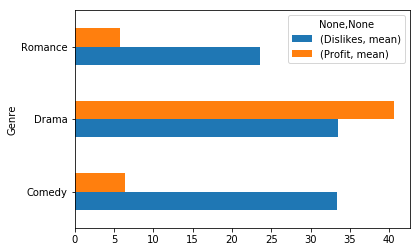

In [284]:
# instead I'll incoporate additional films that lie under the median of Dislikes 
# our findings display most films hover around the medians dislikes that hold high scores 
Bits = Movies.loc[(Movies['Dislikes'] < 45) & (Movies['Profit'] > 5.1)]
for Coins, Sparks  in Bits.groupby(['Genre'])['Film'].count().iteritems():
    print(Coins, Sparks) # deliver an accurate count of each specific type of movie
# 
Bits.groupby(['Genre'])[['Dislikes', 'Profit']].agg(['mean']).plot(kind = 'barh')

In [285]:
Least_Criticized = Movies.describe().loc['25%', 'Dislikes'] # 26.0
Most_Approved = Movies.describe().loc['75%', 'Likes'] # 75.0

LCMA = Movies.loc[(Movies['Dislikes'] < 25.0) & (Movies['Likes'] > 75.0)]
print(' Lowest Critisim and Highest Praise : ' , LCMA['Film'].count()) # There is only one film that has such a perfect rating
# Is there a relationship among holding a high praise and low criticism ? 
Second_Tier = Movies.loc[(Movies['Dislikes'] < 50) & (Movies['Likes'] > 75.0)]
print(' Medium amoutn of Criticism and Highest Praise : ' , Second_Tier['Film'].count())
# Still a small amount of ovies falling under the median of criticism and obtaining the higher rate of praise over the 3rd Quantile 
Cubes = Movies.loc[(Movies['Dislikes'] > 50) & (Movies['Likes'] > 75)]
print(' Highest amount og Criticisim and Praise : ', Cubes['Film'].count()) 
 # This observation is more realistic and can be used for further analysis 

 Lowest Critisim and Highest Praise :  1
 Medium amoutn of Criticism and Highest Praise :  4
 Highest amount og Criticisim and Praise :  15


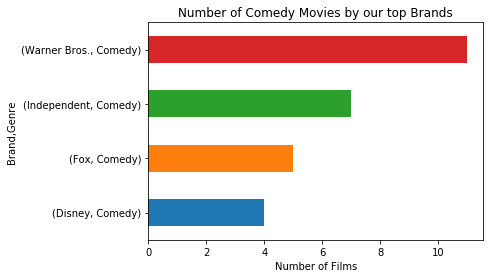

In [286]:
# Which Brands to follow for ideas on Comedy Movies ( competitive analysis )
Alls = Movies.query('Genre == "Comedy"')
Rite = Alls.groupby(['Brand','Genre'])['Genre'].count()
Ins = Rite.drop(['Paramount',  'The Weinstein Company', 'Lionsgate', 'CBS', 'New Line', 'Universal', 'Summit', 'Sony'])
Most = Alls.groupby(['Brand', 'Genre'])['Profit'].sum().drop(['Paramount',  'The Weinstein Company', 'Lionsgate', 'CBS', 'New Line', 'Universal', 'Summit', 'Sony'])
fig , ax = plt.subplots()
ax.set(title = 'Number of Comedy Movies by our top Brands', xlabel = 'Number of Films', ylabel = 'Brands')
Ins.plot(kind = 'barh')

Amount of Romance Films per Brand
Brand
20th Century Fox         1
Independent              7
Summit                   1
The Weinstein Company    1
Universal                1
Warner Bros.             2
Name: Film, dtype: int64
                          Profit  Global_Gains
Brand                                         
20th Century Fox        1.983200     39.660000
Independent             4.529666    149.821429
Summit                 10.180027    376.660000
The Weinstein Company   1.747542     41.940000
Universal               0.000000     30.150000
Warner Bros.            3.091920    143.970000


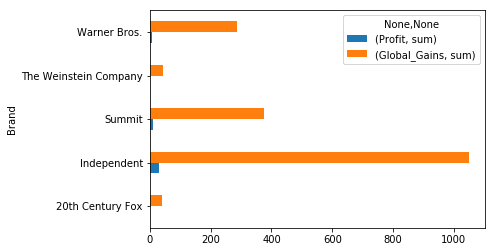

In [287]:
# which brands can actually generate a visible enough profit on the chart next to it's global gain 
Romances = Movies.loc[(Movies['Genre'] == "Romance")]
Kiss = Romances.groupby(['Brand'])[['Genre','Profit', 'Film', 'Global_Gains']]
print('Amount of Romance Films per Brand')
print(Romances.groupby(['Brand']).Film.count())
print(Kiss.mean())
Routes = Kiss.agg(['sum']).drop(['Universal'])
Routes.plot(kind ='barh')

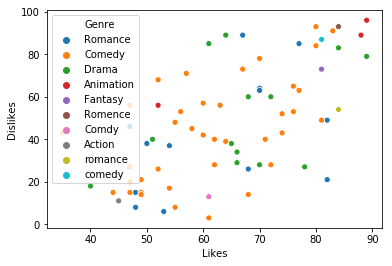

In [288]:
# find out if there is a correlation among likes and dislikes 
sns.scatterplot(x = 'Likes', y = 'Dislikes', data = Movies, hue =  'Genre')
# there is no relationships as the more dislikes unfourtunately increases along with  likes 
# a low dislike score contributes to good ratings 

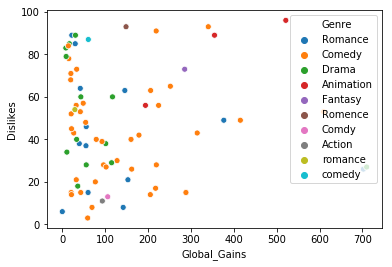

In [289]:
# high amount of dislikes caused by low gains
sns.scatterplot(y = 'Dislikes', x = 'Global_Gains', data = Movies, hue = 'Genre')
# while the majority of films lie under 100 the majority of the movies past that cap actualluy have more than less dislikes

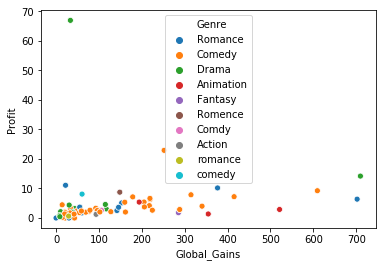

In [290]:
# will a low global gain contribute to low returns on the profit 
sns.scatterplot(y = 'Profit', x = 'Global_Gains', data = Movies, hue = 'Genre')
# it does show that higeher gains contribute to a return on profit over the average mean 
# the majority of films gain less than 100 and hold profits lying under than overall mean 

In [291]:
# I chose these questions due to to the businessn requirements of finding out which films generate the most profits and popularity
# It will provide greater insight for Microsoft prior to enterign the Movie Industry
# I decided on the data cleaning options based on the end goal of wich data  manipulation techinque would I need to choose to fit the calculation
# This libary provided mre with the most resources in comparison to the latters 
# These visualizations illustrated the dymamics of the indutry and it's Key Performance Indicators 
# Those feature predictors were most versitile and could be used with more than one differntial variable
# the results are clear within teh visualizations and those specific genres and brands gives us a clear illustration of what types of movies are most suitable 
# I'm very confident and feel that this will bring in a large amount of market share 
# Bad formatted with the data. In an information economu the data is apart of the businesses critical infrasructure and powers it
